<a href="https://colab.research.google.com/github/abhiram274/MachineLearning_concepts/blob/main/HousePrice_Different_Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔹 Multiple Linear Regression Results:
MSE: 0.5559
R² Score: 0.5758

🔹 Logistic Regression Results:
Accuracy: 0.8249
Confusion Matrix:
[[1714  362]
 [ 361 1691]]


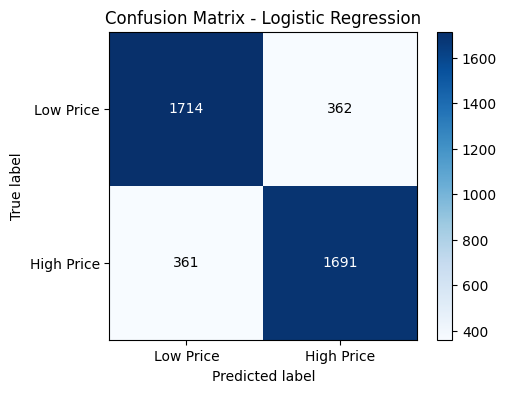

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Load California Housing dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===============================
# 1. MULTIPLE LINEAR REGRESSION
# ===============================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_reg = lin_reg.predict(X_test_scaled)

# Regression metrics
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

print("🔹 Multiple Linear Regression Results:")
print(f"MSE: {mse:.4f}")
print(f"R² Score: {r2:.4f}\n")

# ===============================
# 2. LOGISTIC REGRESSION
# ===============================
# Convert continuous prices into binary classes (0 = Low, 1 = High)
median_price = np.median(y)
y_class = (y >= median_price).astype(int)

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_cls_scaled, y_train_cls)
y_pred_cls = log_reg.predict(X_test_cls_scaled)

# Classification metrics
acc = accuracy_score(y_test_cls, y_pred_cls)
cm = confusion_matrix(y_test_cls, y_pred_cls)

print("🔹 Logistic Regression Results:")
print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(cm)

# ===============================
# Plot Confusion Matrix
# ===============================
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Logistic Regression")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Low Price", "High Price"])
plt.yticks(tick_marks, ["Low Price", "High Price"])
plt.ylabel("True label")
plt.xlabel("Predicted label")

# Annotate cells
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.show()
